In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
from matplotlib.ticker import LogLocator
import metapredict as meta


In [2]:
from finches import Mpipi_frontend, CALVADOS_frontend
from sparrow import Protein

mf = Mpipi_frontend(salt=0.150)
cf = CALVADOS_frontend(salt=0.150)



/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


In [3]:
ProtA = 'MSDAAVDTSSEITTKDLKEKKEVVEEAENGRDAPANGNAENEENGEQEADNEVDEEEEEGGEEEEEEEEGDGEEEDGDEDEEAESATGKRAAEDDEDDDVDTKKQKTDEDD'
h1_fl = 'CTENSTSAPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSSRQSIQKYIKSHYKVGENADSQIKLSIKRLVTTGVLKQTKGVGASGSFRLAKSDEPKKSVAFKKTKKEIKKVATPKKASKPKKAASKAPTKKPKATPVKKAKKKLAATPKKAKKPKTVKAKPVKASKPKKAKPVKPKAKSSAKRAGKKKGGPR'

h1_ntd = 'GCENSTSAPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSSRQSIQKYIKSHYKVGENADSQIKLSIKRLVTTGVLKQTKGVGASGSFRLAKSDEPKKSVAFKKTKKEI'
h1_ctd = 'SVAFKKTKKEIKKVATPKKASKPKKAASKAPTKKPKATPVKKAKKKLAATPKKAKKPKTVKAKPVKASKPKKAKPVKPKAKSSAKRAGKKKGGPR'

print(h1_fl.find('SVAFKK'))
print(len(h1_ntd))

103
114


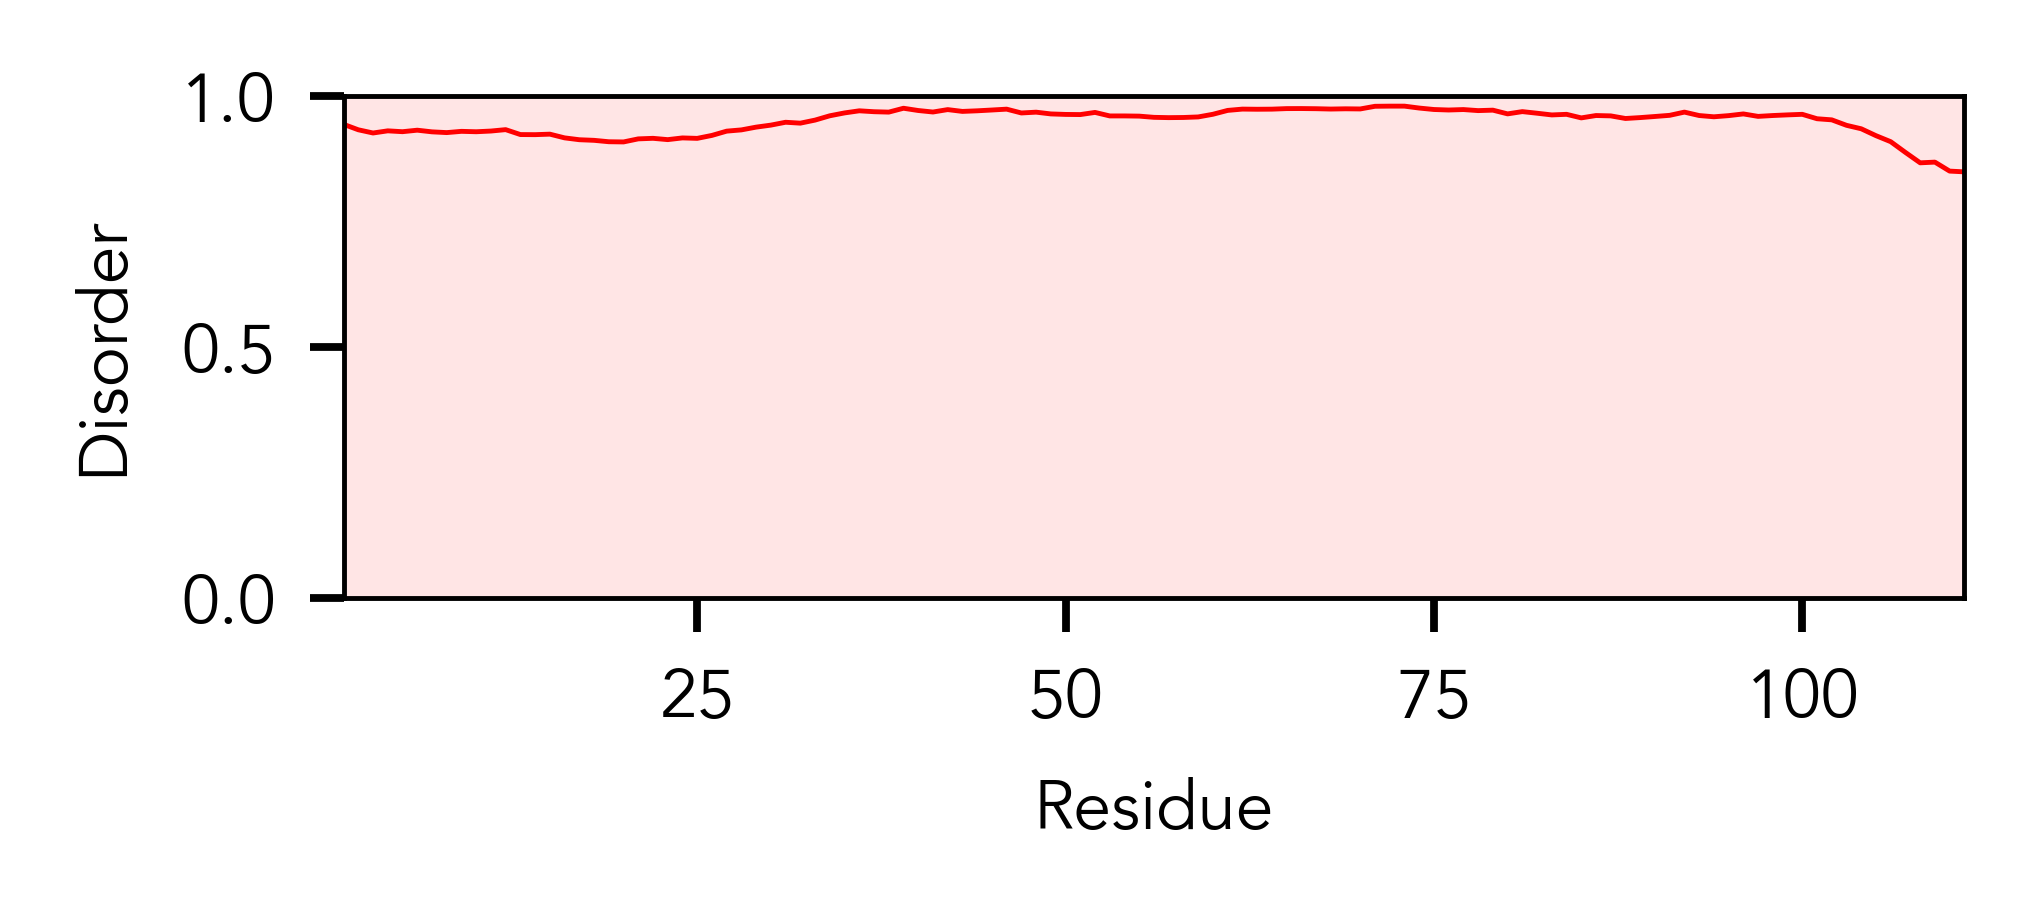

In [11]:
figure(None, (3,1.4), dpi=350)
ax = plt.gca()
seq = ProtA
idx = np.arange(1,len(seq)+1)
plt.plot(idx, meta.predict_disorder(seq), color='r', lw=0.5)
doms = meta.predict_disorder_domains(seq)
for d in doms.disordered_domain_boundaries:
    ax.axvspan(d[0],d[1],lw=0, color='r', alpha=0.1)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Residue',fontsize=7)
plt.ylabel('Disorder',fontsize=7)
plt.ylim([0,1])
plt.xlim([1,idx[-1]])
plt.tight_layout()
plt.savefig('out_figures/disorder_prot_alpha.pdf')

IDR: 1-28
IDR: 85-198


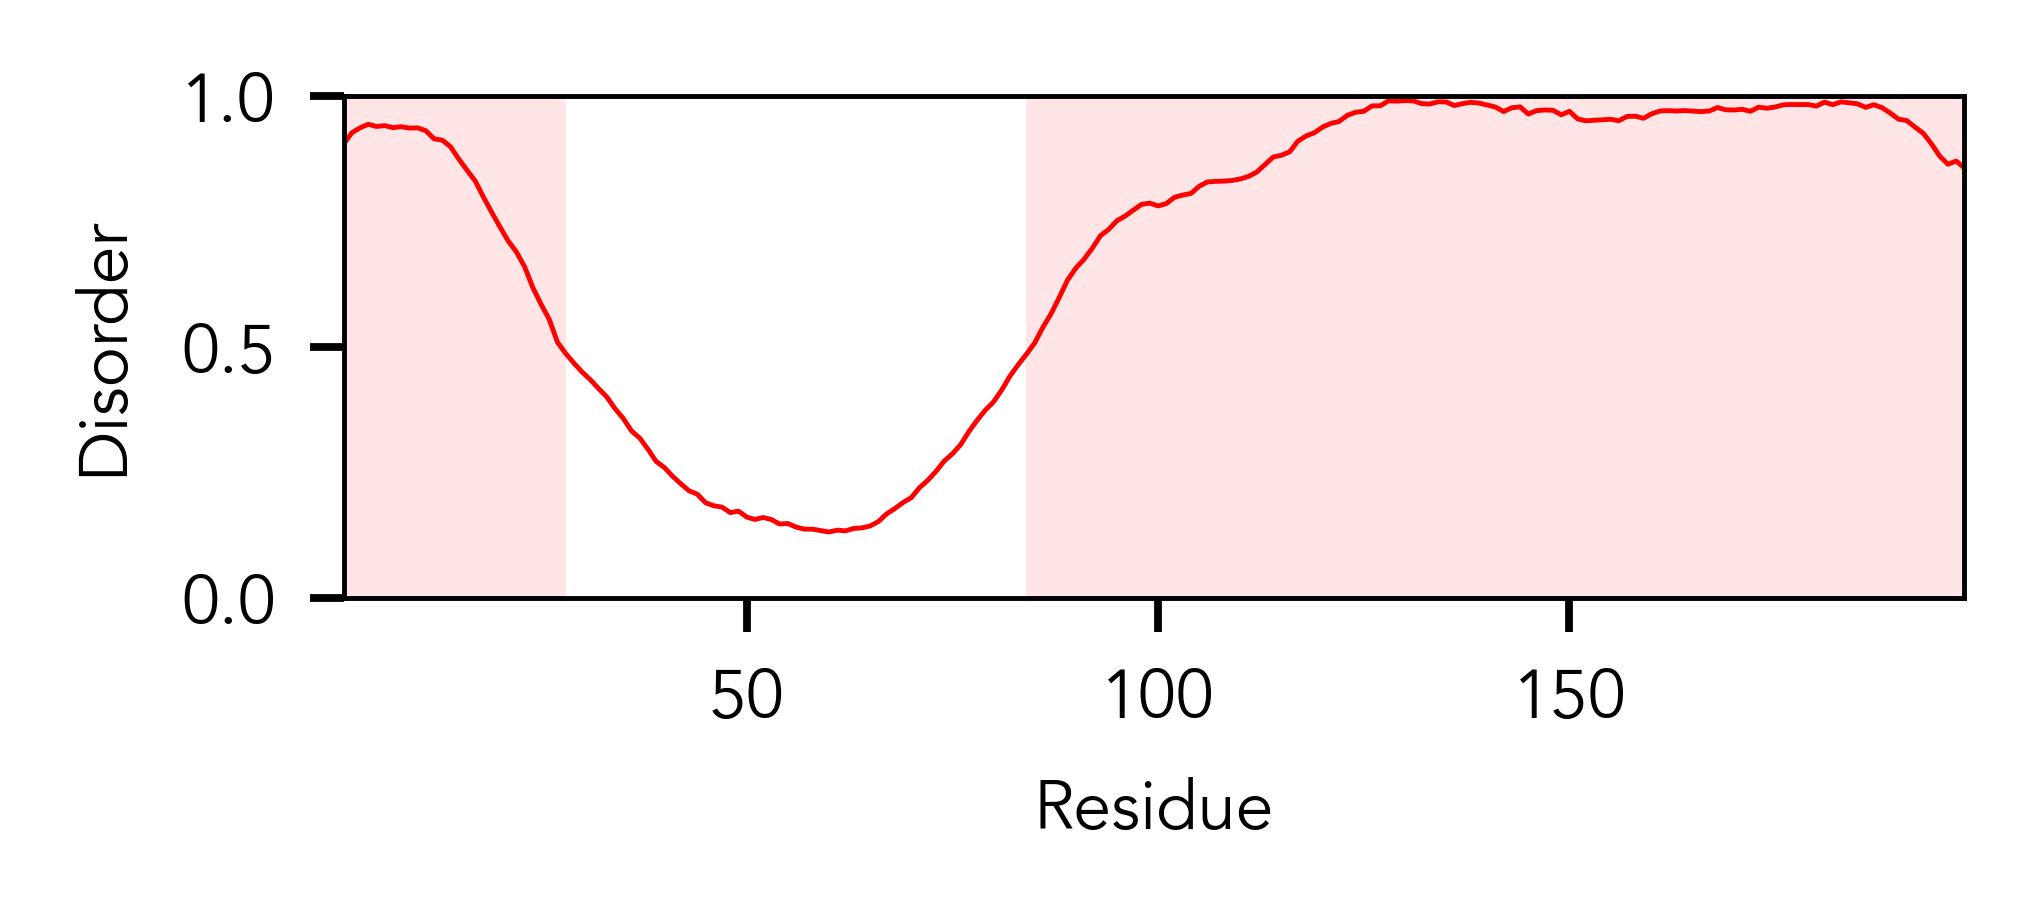

In [10]:
figure(None, (3,1.4), dpi=350)
ax = plt.gca()
seq = h1_fl
idx = np.arange(1,len(seq)+1)
plt.plot(idx, meta.predict_disorder(seq), color='r', lw=0.5)
doms = meta.predict_disorder_domains(seq)
for d in doms.disordered_domain_boundaries:
    print(f"IDR: {d[0]+1}-{d[1]}")
    ax.axvspan(d[0],d[1],lw=0, color='r', alpha=0.1)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Residue',fontsize=7)
plt.ylabel('Disorder',fontsize=7)
plt.ylim([0,1])
plt.xlim([1,idx[-1]])
plt.tight_layout()
plt.savefig('out_figures/disorder_prot_h1.pdf')

(<Figure size 2975x2975 with 4 Axes>,
 <Axes: >,
 <Axes: >,
 <Axes: >,
 <Axes: >)

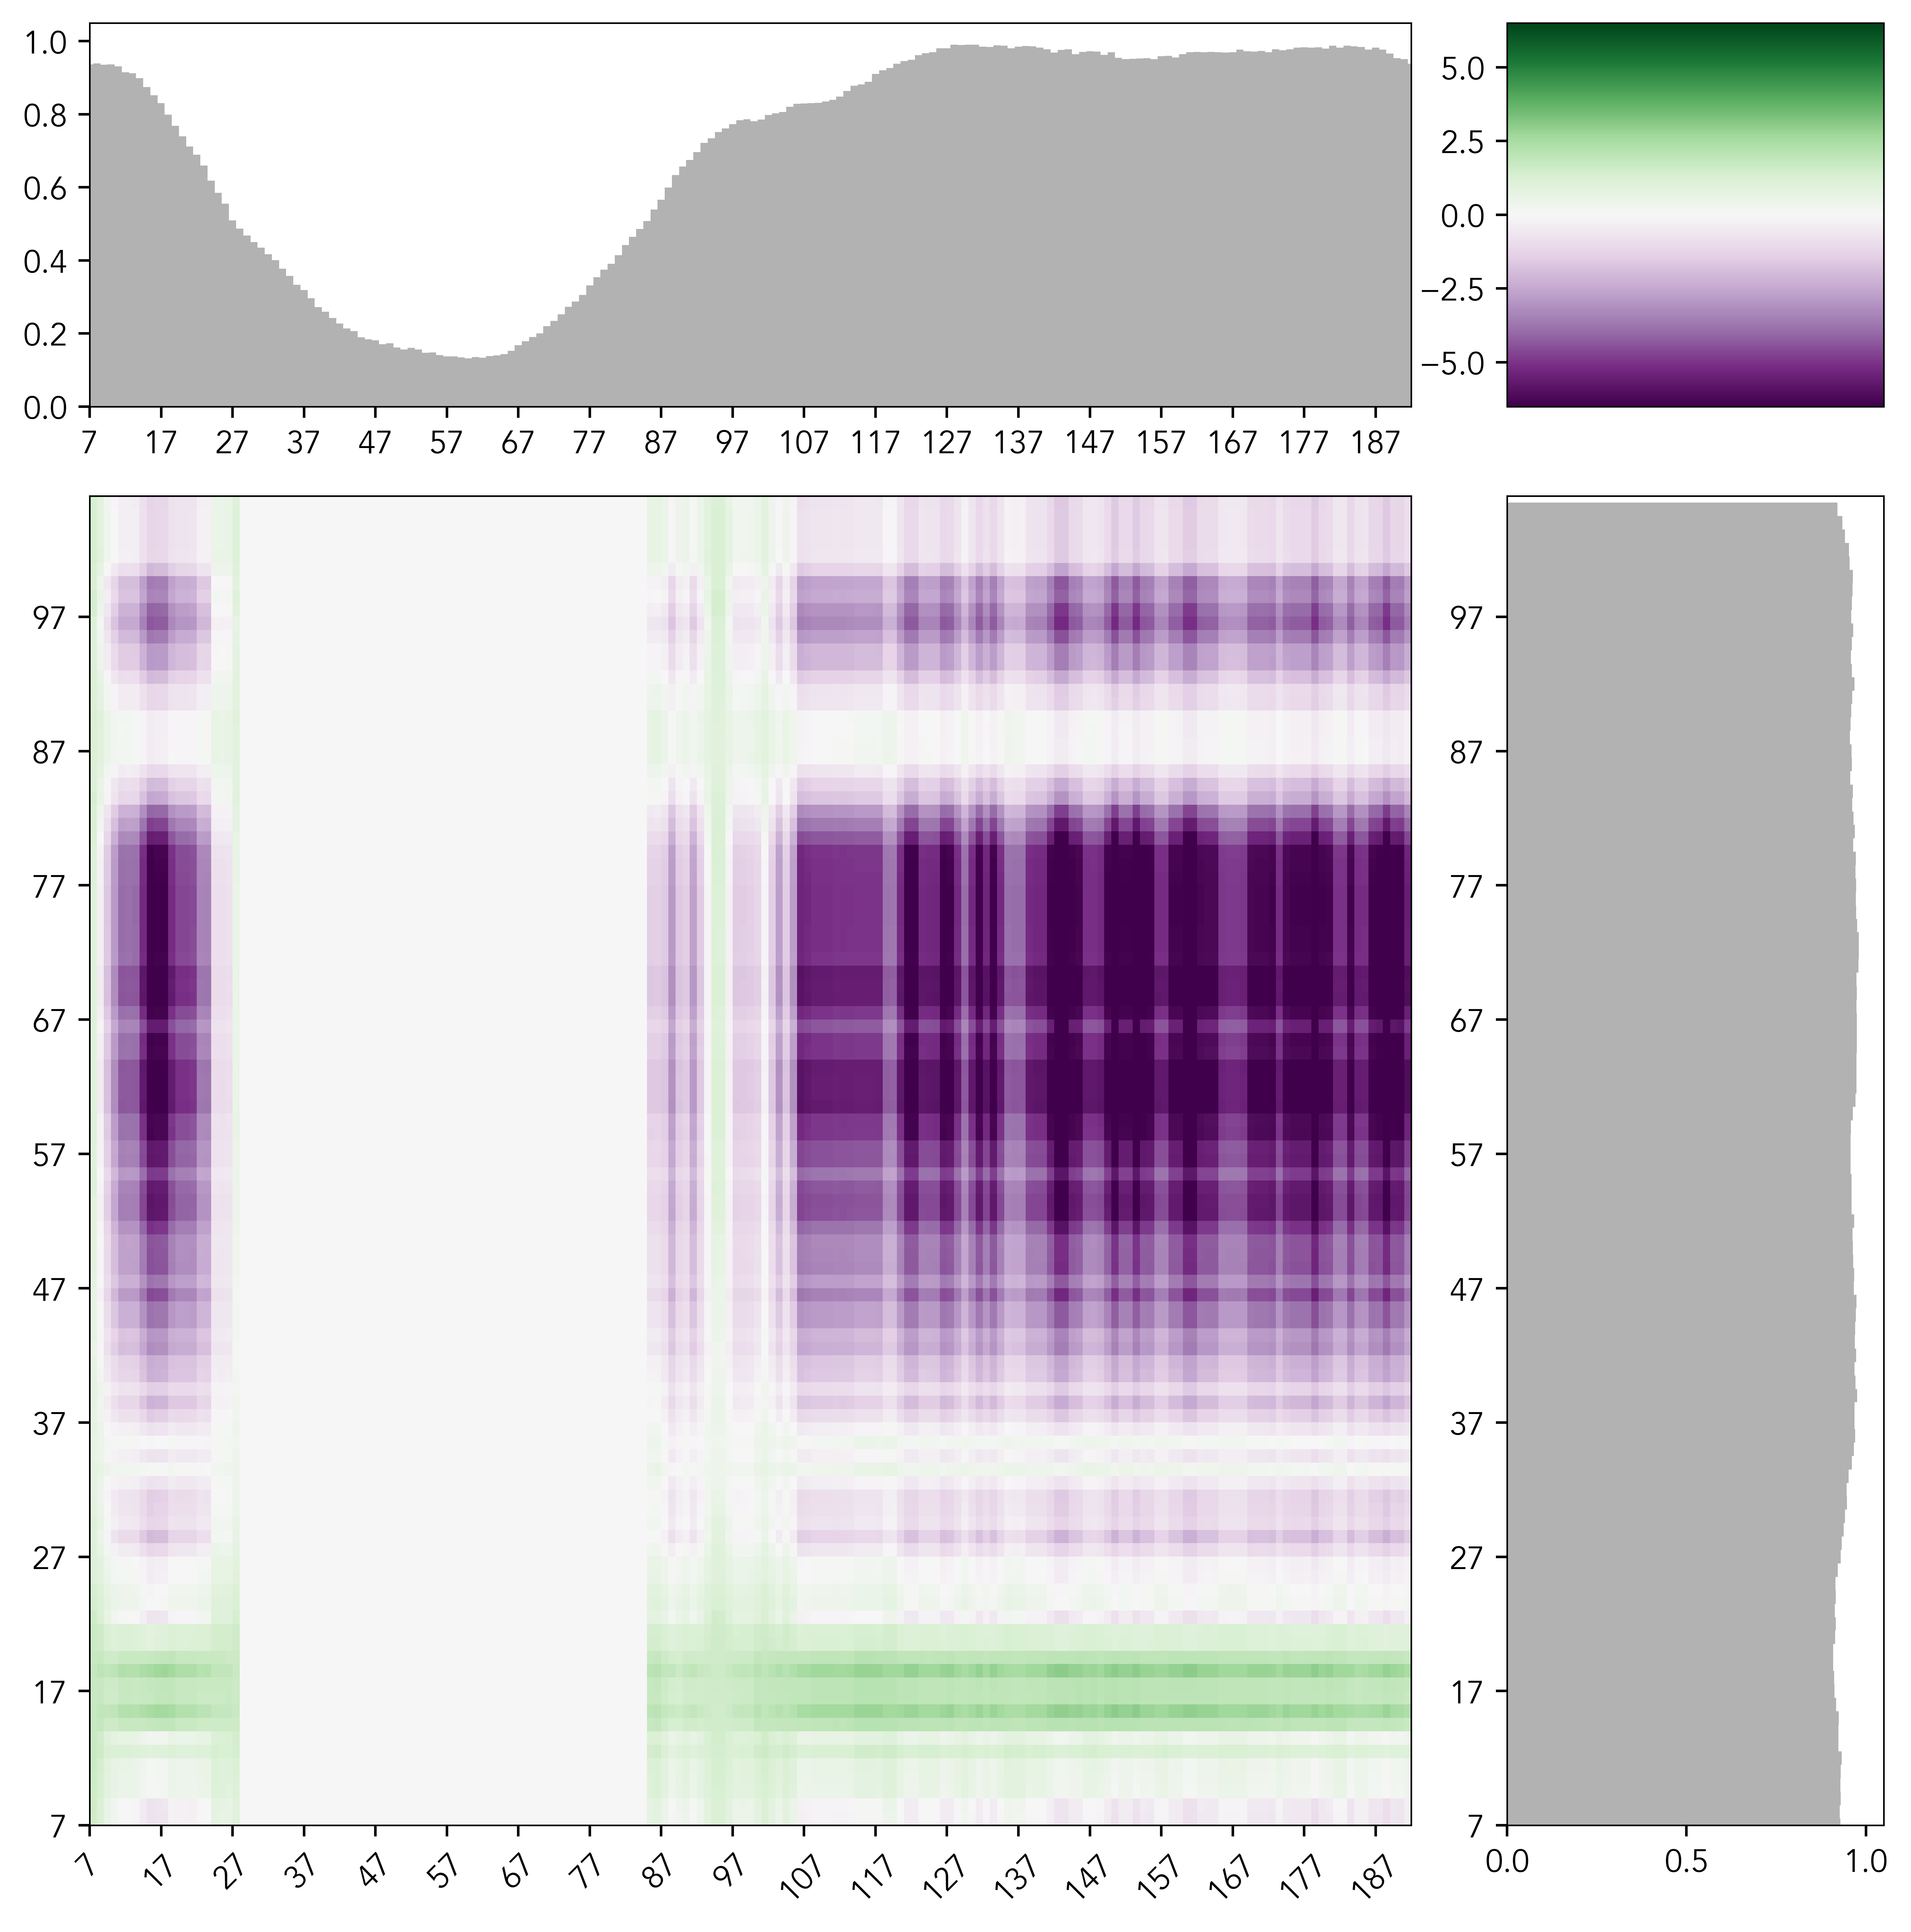

In [9]:
mf = Mpipi_frontend(salt=0.250)
mf.interaction_figure(h1_fl, ProtA, window_size=13, vmin=-6.5, vmax=6.5, tic_frequency=10, fname='out_figures/h1_prot_intermap.pdf')

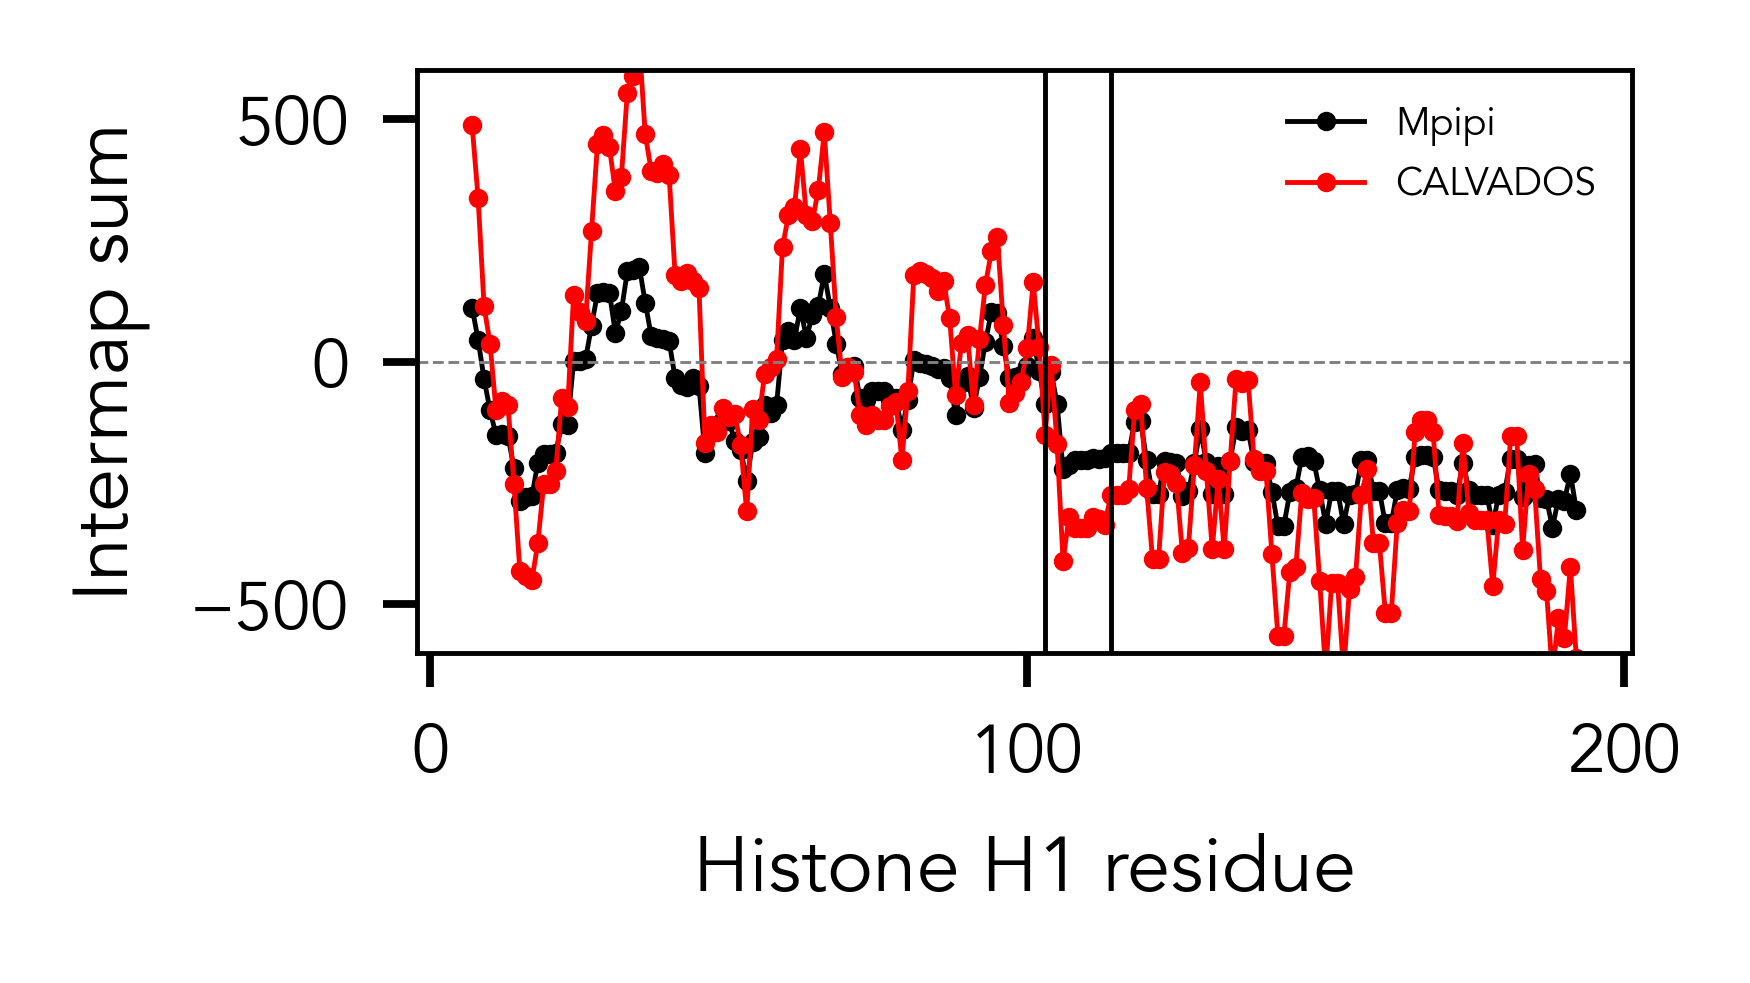

In [12]:
figure(None, (2.6,1.5), dpi=350)
ax = plt.gca()


A_mf = mf.intermolecular_idr_matrix(ProtA,h1_fl, window_size=13)
A_cf = cf.intermolecular_idr_matrix(ProtA,h1_fl, window_size=13)


offset = 0
plt.plot(A_mf[0][2]+offset, 1*np.sum(A_mf[0][0],0),'.k-',  ms=4, mew=0, lw=0.5, label='Mpipi')
plt.plot(A_cf[0][2]+offset, 1*np.sum(A_cf[0][0],0),'.r-', ms=4, mew=0, lw=0.5, label='CALVADOS')
ax = plt.gca()
ax.axhline(0,color='grey', ls='--',lw=0.3)
plt.legend(fontsize=4,frameon=False)

ax.axvline(103,color='k', lw=0.5)
ax.axvline(114,color='k', lw=0.5)

plt.ylim([-600,600])    

plt.xlabel('Histone H1 residue', fontsize=8)
plt.ylabel('Intermap sum', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.savefig('out_figures/h1_protA_linear.pdf')


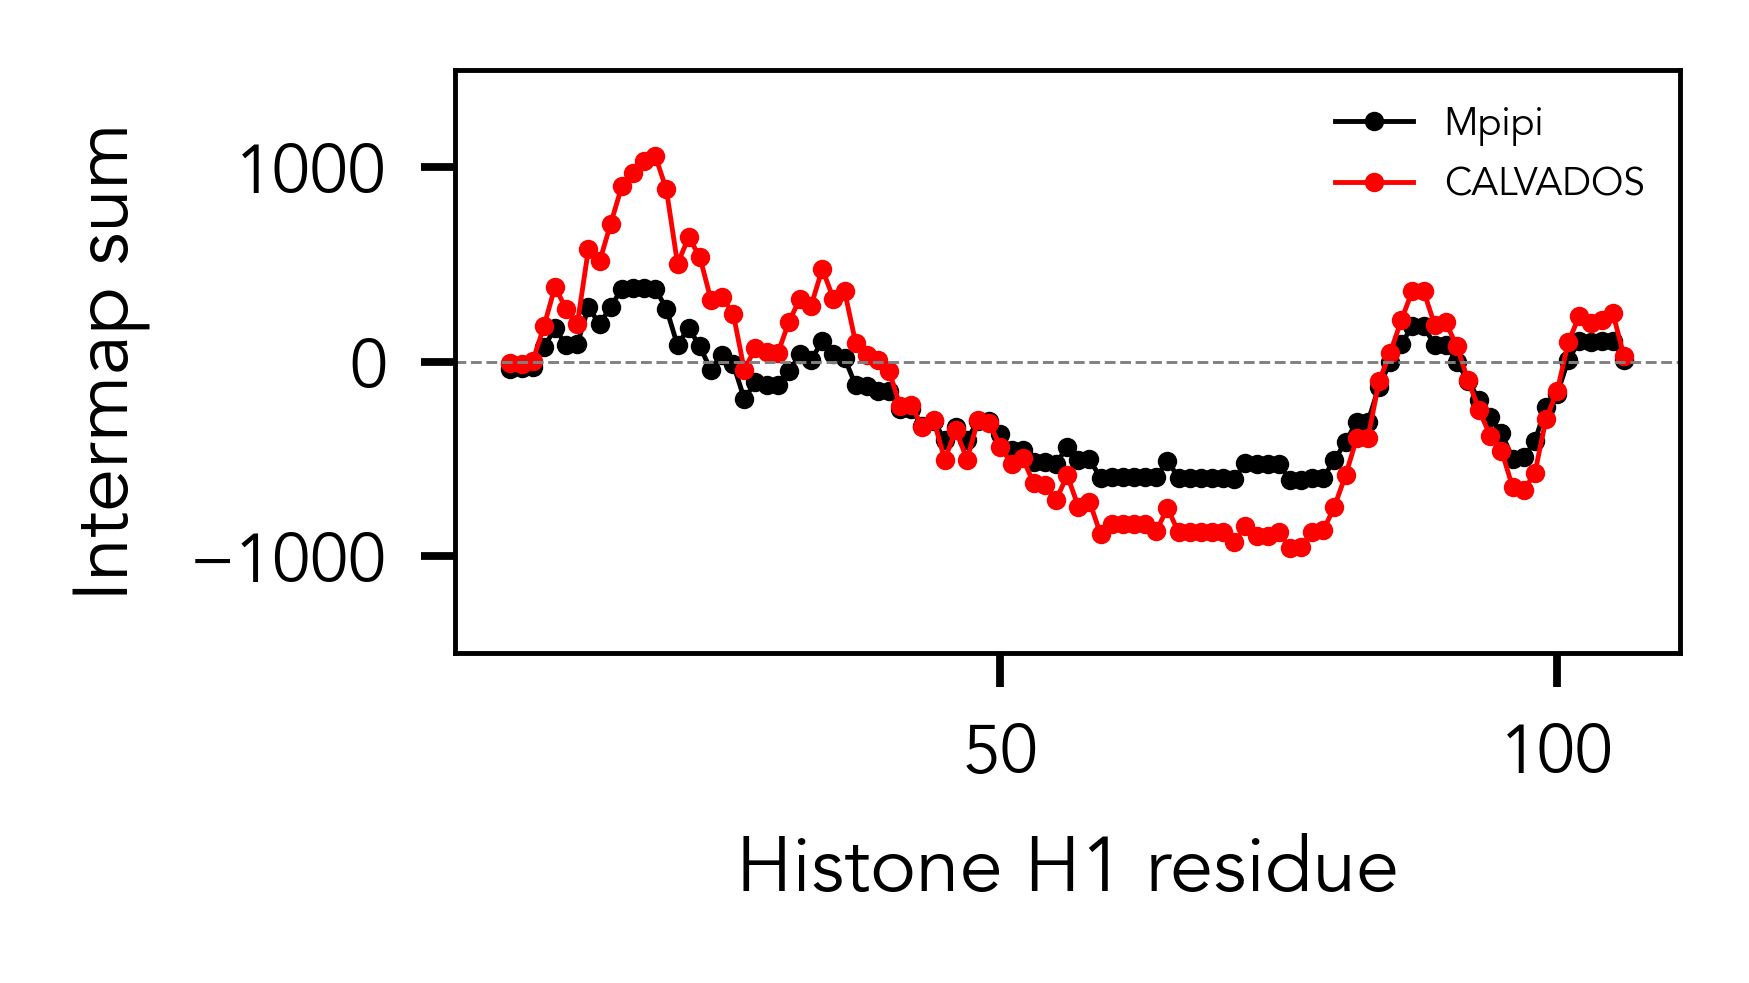

In [13]:
figure(None, (2.6,1.5), dpi=350)
ax = plt.gca()


A_mf = mf.intermolecular_idr_matrix(ProtA,h1_fl, window_size=11)
A_cf = cf.intermolecular_idr_matrix(ProtA,h1_fl, window_size=11)


offset = 0
plt.plot(A_mf[0][1]+offset, 1*np.sum(A_mf[0][0],1),'.k-',  ms=4, mew=0, lw=0.5, label='Mpipi')
plt.plot(A_cf[0][1]+offset, 1*np.sum(A_cf[0][0],1),'.r-', ms=4, mew=0, lw=0.5, label='CALVADOS')
ax = plt.gca()
ax.axhline(0,color='grey', ls='--',lw=0.3)
plt.legend(fontsize=4,frameon=False)

#ax.axvline(103,color='k', lw=0.5)
#ax.axvline(114,color='k', lw=0.5)

plt.ylim([-1500, 1500])    

plt.xlabel('Histone H1 residue', fontsize=8)
plt.ylabel('Intermap sum', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
#plt.savefig('out_figures/h1_protA_linear.pdf')


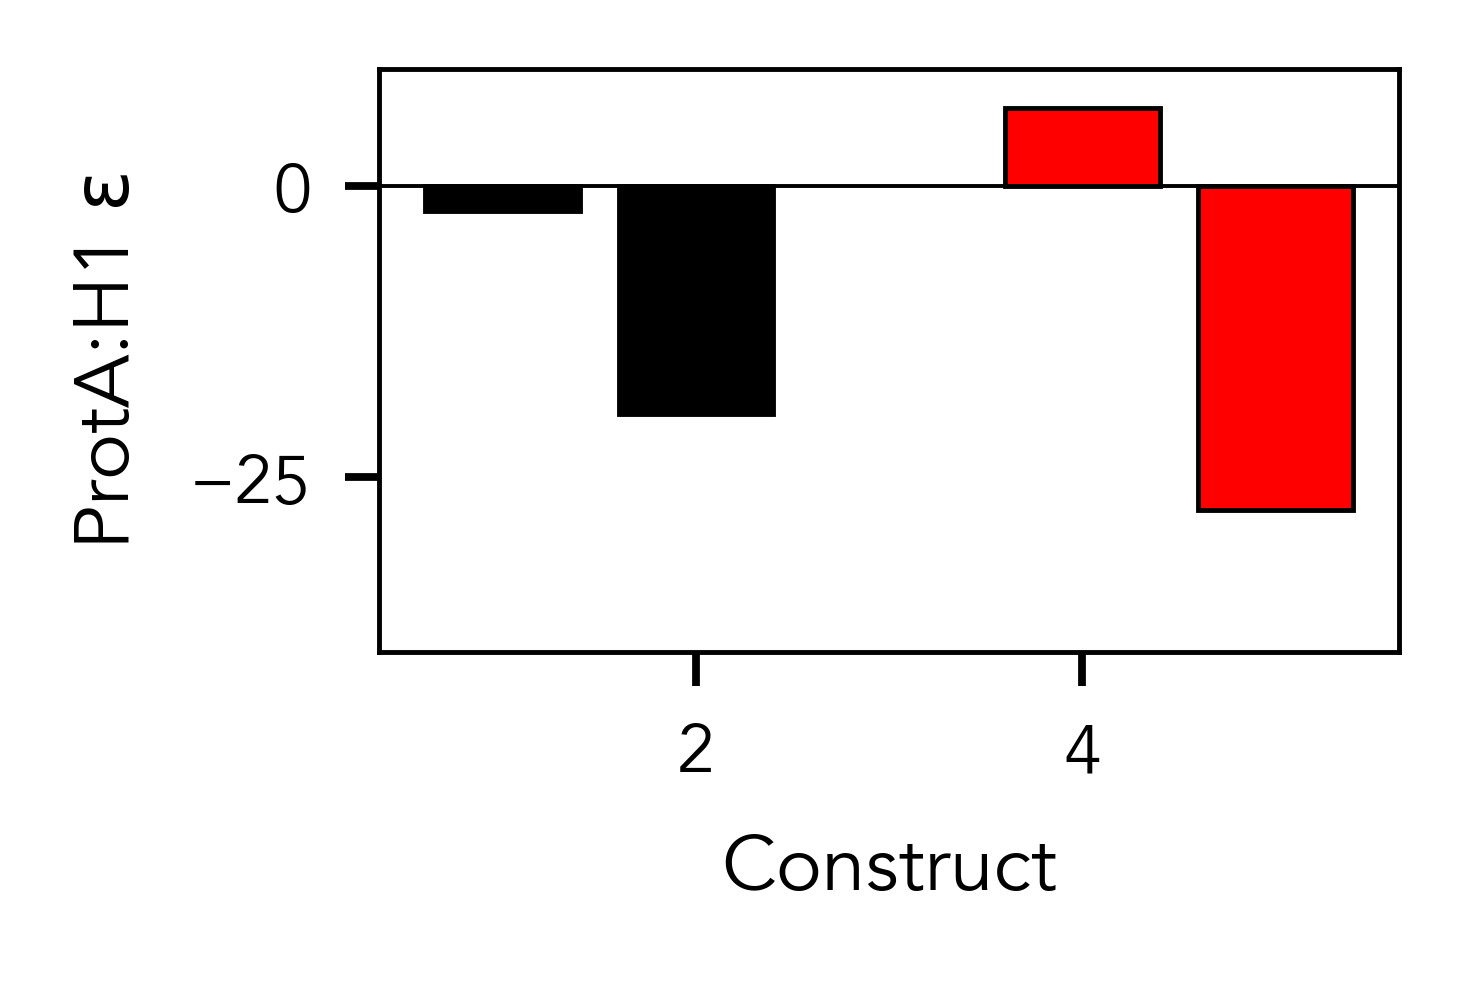

In [14]:
eps_ntd_mf = mf.epsilon(ProtA, h1_ntd)
eps_ctd_mf = mf.epsilon(ProtA, h1_ctd)
eps_fl_mf = mf.epsilon(ProtA, h1_fl)


eps_ntd_cf = cf.epsilon(ProtA, h1_ntd)
eps_ctd_cf = cf.epsilon(ProtA, h1_ctd)
eps_fl_cf = cf.epsilon(ProtA, h1_fl)


figure(None, (2.2,1.5), dpi=350)
ax = plt.gca()

#plt.bar([1,2,3], [eps_fl_mf, eps_ntd_mf, eps_ctd_mf, ], color='k', edgecolor='k', linewidth=0.5)
#plt.bar([5,6,7], [eps_fl_cf, eps_ntd_cf, eps_ctd_cf, ], color='r', edgecolor='k', linewidth=0.5)

plt.bar([1,2], [eps_ntd_mf, eps_ctd_mf, ], color='k', edgecolor='k', linewidth=0.5)
plt.bar([4,5], [eps_ntd_cf, eps_ctd_cf, ], color='r', edgecolor='k', linewidth=0.5)
ax.axhline(0,color='k', lw=0.4)
plt.xlabel('Construct', fontsize=8)


plt.ylim([-40, 10])

#plt.xlabel('Histone H1 residue', fontsize=8)
plt.ylabel(r'ProtA:H1 $ \rm\epsilon $', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()

plt.savefig('out_figures/h1_protA_n_c.pdf')


## NB
This cell generates the data for Fig. 5B - we have to do this stupid trick because otherwise the log bar plot cannot be opened in Illustrator!

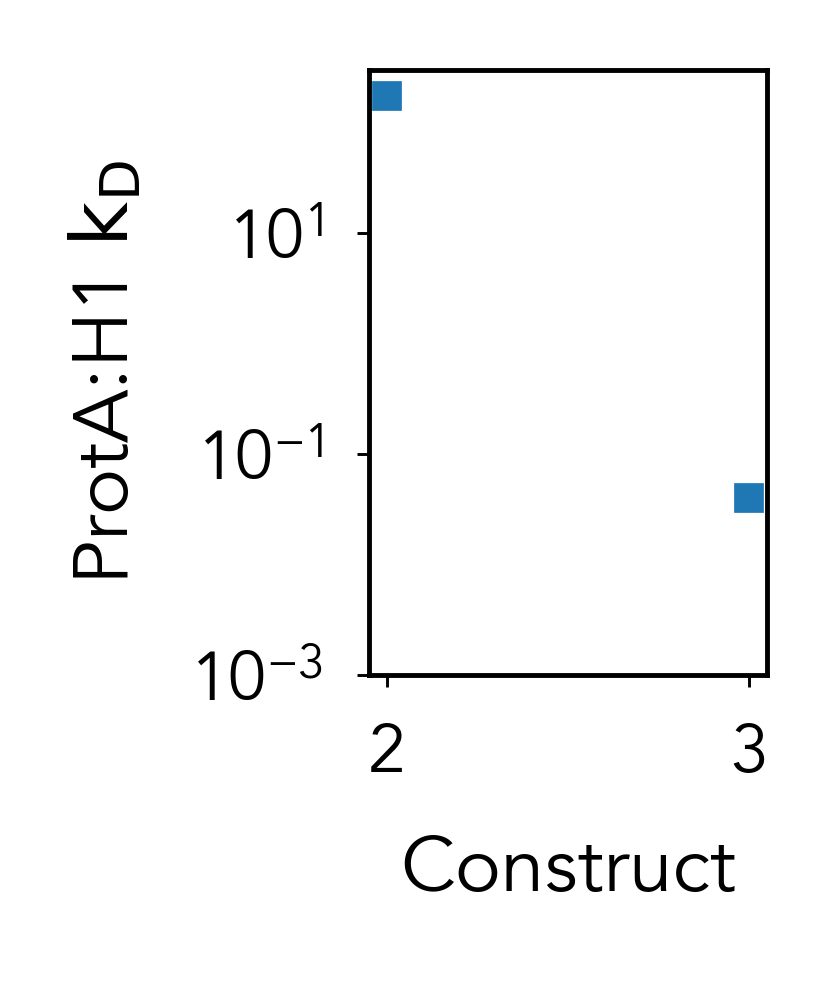

In [15]:
figure(None, (1.3,1.5), dpi=350)
ax = plt.gca()

plt.plot([2,3], [173, 0.04], 's', ms=2)
plt.yscale('log')
ax.axhline(0,color='k', lw=0.4)
plt.xlabel('Construct', fontsize=8)
plt.ylim([0.001,300])


#ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 1, numticks=10))

ax.tick_params(axis='both',          # changes apply to both x and y-axis
               which='major',        # major ticks are affected
               length=1.2,            # length of the ticks
               width=0.3,              # width of the ticks
               color='k')          # color of the ticks


#plt.xlabel('Histone H1 residue', fontsize=8)
plt.ylabel(r'ProtA:H1 $ \rm k_D $', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.savefig('out_figures/h1_protA_fl_n_c_fa.pdf')


In [28]:
start = np.log10(0.01)
end = np.log10(0.5)
salt = np.logspace(start, end, num=20)

In [29]:
cf_eps_salt = []
mf_eps_salt = []
for s in salt:
    cf = CALVADOS_frontend(salt=s)
    cf_eps_salt.append(cf.epsilon(ProtA, h1_fl))

    mf = Mpipi_frontend(salt=s)
    mf_eps_salt.append(mf.epsilon(ProtA, h1_fl))

/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )
/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )
/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882

0.5
0.17859637297609765


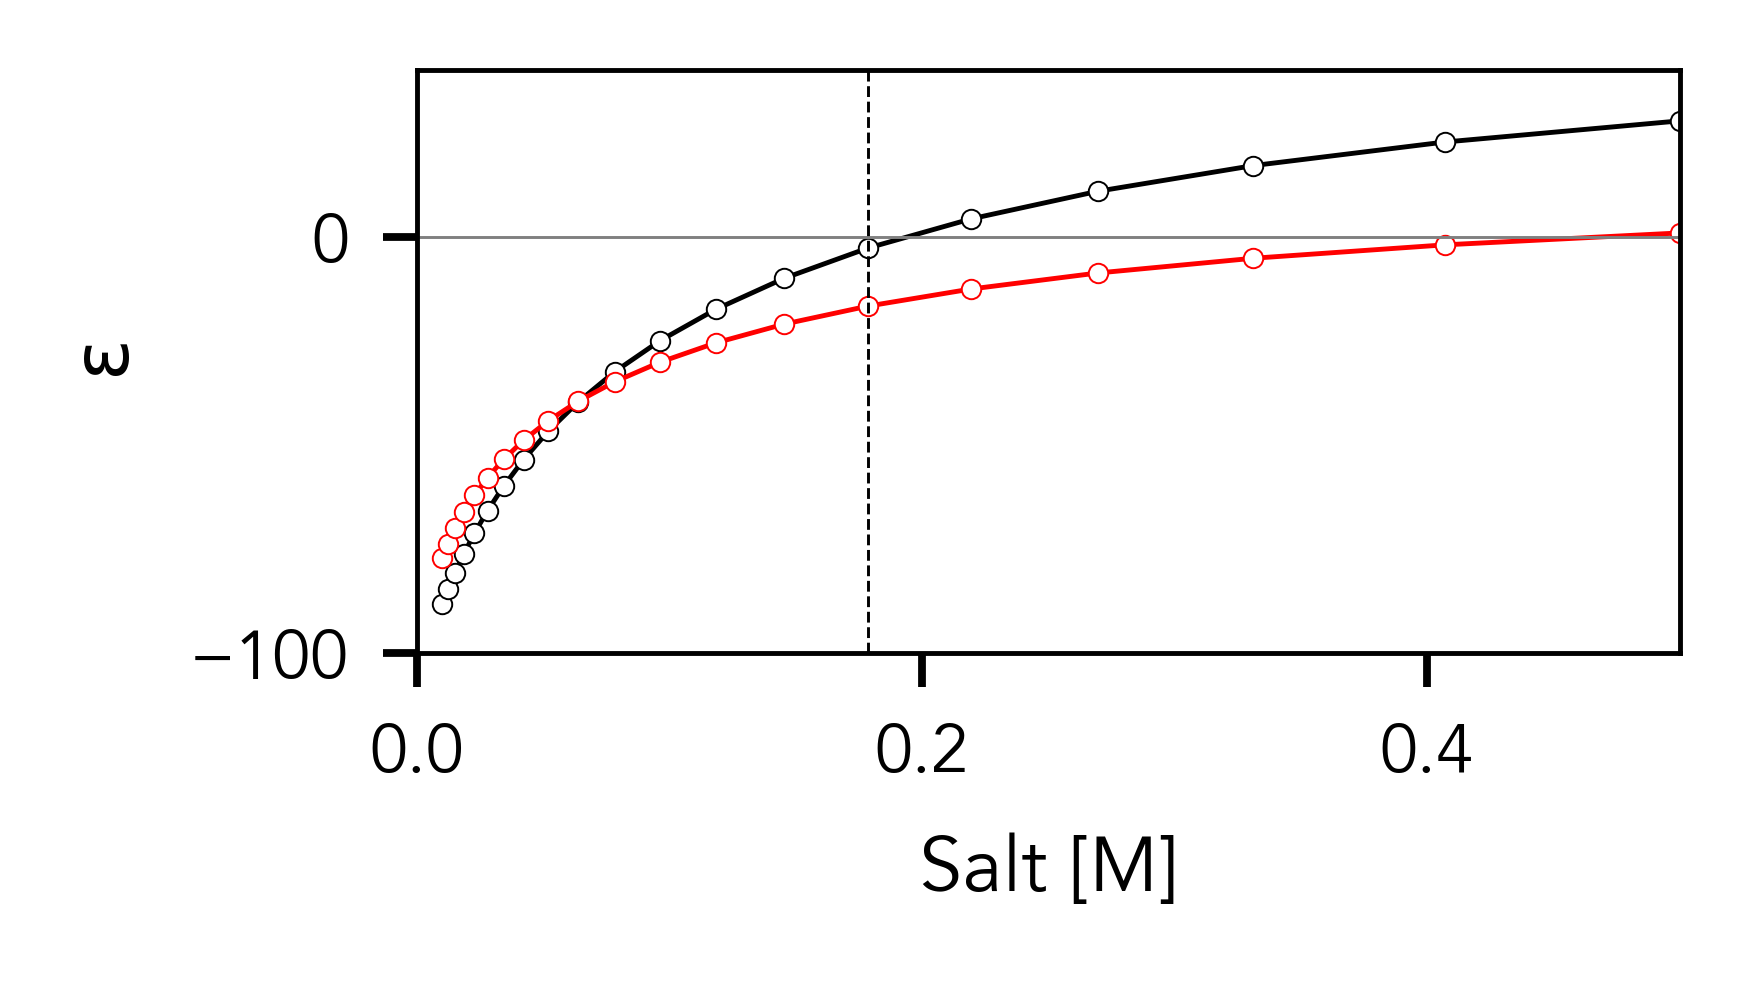

In [30]:
figure(None, (2.6,1.5), dpi=350)
ax = plt.gca()

plt.plot(salt,cf_eps_salt, '-ok', ms=2,lw=0.5, mfc='w', mew=0.2)
plt.plot(salt,mf_eps_salt, '-or', ms=2,lw=0.5, mfc='w', mew=0.2)
plt.xticks(np.arange(0,1.2,0.2), fontsize=7)
ax.axhline(0, color='grey',lw=0.3, ls='-')

salt_0_mf = salt[np.argmin(np.abs(mf_eps_salt))]
salt_0_cf = salt[np.argmin(np.abs(cf_eps_salt))]

ax.axvline(salt_0_mf, color='r',lw=0.3, ls='--')
ax.axvline(salt_0_cf, color='k',lw=0.3, ls='--')
print(salt_0_mf)
print(salt_0_cf)
plt.xlabel('Salt [M]', fontsize=8)
plt.ylabel(r'$\rm \epsilon$', fontsize=8)

plt.yticks(fontsize=7)
plt.ylim([-100, 40])
plt.xlim([0,0.5])

plt.tight_layout()
plt.savefig('out_figures/h1_protA_salt.pdf')

